#K Nearest Neighbors 

##Importing necessary libraries

In [83]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

##Loading Datasets


In [84]:
df = pd.read_csv('/content/drive/My Drive/DataSets/credit_data.csv')
df.head(10)

,clientid,income,age,loan,LTI,default
0,1,66155.925095,59.017015,8106.532131,0.122537,0
1,2,34415.153966,48.117153,6564.745018,0.190752,0
2,3,57317.170063,63.108049,8020.953296,0.139940,0
3,4,42709.534201,45.751972,6103.642260,0.142911,0
4,5,66952.688845,18.584336,8770.099235,0.130989,1
5,6,24904.064140,57.471607,15.498598,0.000622,0
6,7,48430.359613,26.809132,5722.581981,0.118161,0
7,8,24500.141984,32.897548,2971.003310,0.121265,1
8,9,40654.892537,55.496853,4755.825280,0.116980,0
9,10,25075.872771,39.776378,1409.230371,0.056199,0


In [85]:
print(df.isna().sum(axis = 0))
df.describe()

clientid    0
income      0
age         0
loan        0
LTI         0
default     0
dtype: int64


,clientid,income,age,loan,LTI,default
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.927143,4444.369695,0.098403,0.141500
std,577.494589,14326.327119,13.262450,3045.410024,0.057620,0.348624
min,1.000000,20014.489470,18.055189,1.377630,0.000049,0.000000
25%,500.750000,32796.459717,29.062492,1939.708847,0.047903,0.000000
50%,1000.500000,45789.117313,41.382673,3974.719419,0.099437,0.000000
75%,1500.250000,57791.281668,52.596993,6432.410625,0.147585,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,0.199938,1.000000


######Note: No data cleaning Needed

##Feature Extraction

In [86]:
features = df[['income', 'age', 'loan']].values
result = df[['default']].values.reshape(len(result),)
print(features)

[[6.61559251e+04 5.90170151e+01 8.10653213e+03]
 [3.44151540e+04 4.81171531e+01 6.56474502e+03]
 [5.73171701e+04 6.31080495e+01 8.02095330e+03]
 ...
 [4.43114493e+04 2.80171669e+01 5.52278669e+03]
 [4.37560566e+04 6.39717958e+01 1.62272260e+03]
 [6.94365796e+04 5.61526170e+01 7.37883360e+03]]


##Train - Test Split

In [87]:
from sklearn.model_selection import train_test_split
features_train , features_test, result_train, result_test = train_test_split( features, result, test_size = 0.2 )

##Training Model

In [88]:
modelKNN = KNeighborsClassifier( n_neighbors=23 )
modelKNN = modelKNN.fit(features_train, result_train)

##Prediction and evaluation of model

In [89]:
prediction = modelKNN.predict(features_test)
from sklearn.metrics import confusion_matrix
print('The confusion matrix is: ', confusion_matrix(result_split, prediction))
print('The accuracy score is : ', accuracy_score(result_test, prediction))

The confusion matrix is:  [[345   3]
 [ 49   3]]
The accuracy score is :  0.89


##Heatmap For Visualizing Confusion Matrix result

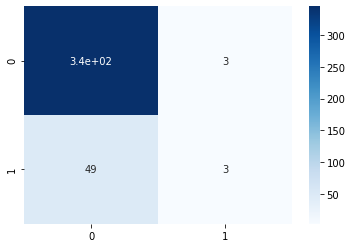

In [90]:
import seaborn as sns 
sns.heatmap( confusion_matrix(result_split, prediction), annot = True, cmap = 'Blues' )

In [93]:
modelKNN = KNeighborsClassifier( n_neighbors = 23 )
score = cross_val_score( modelKNN, features_train, result_train, cv = 5, scoring = 'accuracy' )
print(score)

[0.846875 0.859375 0.846875 0.840625 0.8375  ]


## Using Cross- val- score to find Optimal K value for Classifier

In [92]:
cross_val_scores = []

for i in range(1,25):
  modelKNN = KNeighborsClassifier( n_neighbors = i )
  score = cross_val_score( modelKNN, features_train, result_train, cv = 5, scoring = 'accuracy' )
  cross_val_scores.append( score.mean() )

print('The optimal value of k is : ',np.argmax(cross_val_scores))




The optimal value of k is :  23
